In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as MSE

In [19]:
df = pd.read_csv('Champagne Sales.csv', index_col = 'Month', parse_dates = True)
data = 'Champagne sales'
df.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


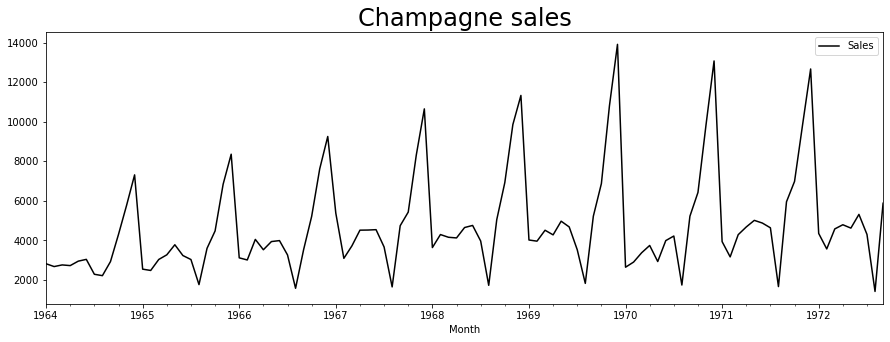

In [30]:
df[data].plot(figsize = (15,5), label = 'Sales', color = 'k')
plt.title(data, size = 24)
plt.legend()
plt.show()

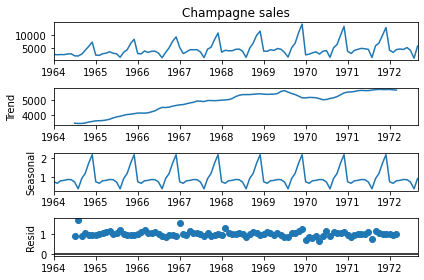

In [33]:
seasonal_decompose(df[data], model = 'multiplicative').plot()
plt.show()

In [35]:
auto_arima(df[data], seasonal = True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -745.083
Date:                             Sun, 07 Mar 2021   AIC                           1498.167
Time:                                     05:47:38   BIC                           1508.297
Sample:                                          0   HQIC                          1502.257
                                             - 105                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    362.8399    100.620      3.606      0.000     165.628     560.052
ma.L1          0.2191      0.074      2.970      0.003       0.075       0.364
ar.S.L12      -0.1784      0.082     -2.186      0.029      -0.338      -0.018
sigma2      5.135e+05   5.75e+04      8.924      0.000    4.01e+05    6.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 8.20
Prob(Q):                              0.55   Prob(JB):                         0.02
Heteroskedasticity (H):               1.27   Skew:                            -0.15
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
total_population = len(df[data])
df_training = df.iloc[:total_population - 12]
df_validation = df.iloc[total_population -12:]

In [60]:
if total_population == len(df_training) + len(df_validation): 
    print('True')

True


In [66]:
model = SARIMAX(df_training[data], seasonal = (0,0,1), seasonal_order = (1, 1, 0, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Champagne sales   No. Observations:                   93
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -658.099
Date:                            Sun, 07 Mar 2021   AIC                           1322.198
Time:                                    06:00:36   BIC                           1329.381
Sample:                                01-01-1964   HQIC                          1325.080
                                     - 09-01-1971                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3077      0.072      4.303      0.000       0.168       0.448
ar.S.L12      -0.1101      0.092     -1.202      0.229      -0.290       0.069
sigma2      6.409e+05   8.58e+04      7.472      0.000    4.73e+05    8.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 8.16
Prob(Q):                              0.59   Prob(JB):                         0.02
Heteroskedasticity (H):               1.62   Skew:                            -0.35
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
start = total_population - 12
end = total_population - 1
prediction = result.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('Predictions')
df_validation['Prediction'] = prediction
df_validation

,Champagne sales,Prediction
Month,,
1971-10-01,6981,6697.905024
1971-11-01,9851,10016.922859
1971-12-01,12670,13189.761958
1972-01-01,4348,3797.931995
1972-02-01,3564,3135.050207
1972-03-01,4577,4185.746814
1972-04-01,4788,4573.115680
1972-05-01,4618,4780.673069
1972-06-01,5312,4776.229093


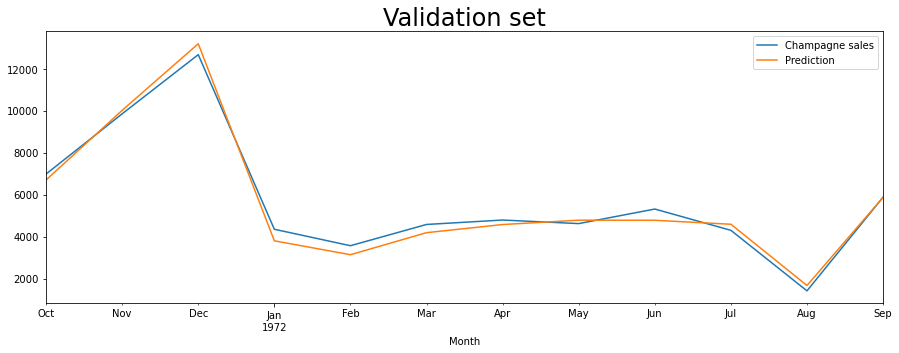

In [75]:
df_validation.plot(figsize = (15, 5))
plt.title('Validation set', size = 24)
plt.show()

In [84]:
mse = MSE(df_validation[data], prediction)
RMSE = mse ** (1/2)
print(f'RMSE = {RMSE}')

RMSE = 356.57079657435776


In [88]:
model = SARIMAX(df[data], order = (0,0,1), seasonal_order = (1, 1, 0, 12))
result = model.fit()
fcast = result.predict(total_population, total_population + 11, typ = 'levels').rename('Forecast')
fcast

1972-10-01     6948.796140
1972-11-01     9850.464325
1972-12-01    12694.164910
1973-01-01     4323.358934
1973-02-01     3540.073168
1973-03-01     4559.679831
1973-04-01     4781.333818
1973-05-01     4641.331637
1973-06-01     5285.930467
1973-07-01     4317.939027
1973-08-01     1427.641793
1973-09-01     5881.404442
Freq: MS, Name: Forecast, dtype: float64

<AxesSubplot:xlabel='Month'>

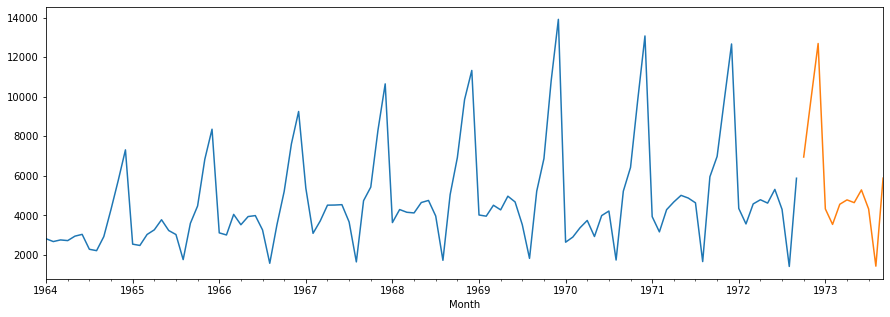

In [90]:
df[data].plot(figsize = (15, 5))
fcast.plot()
plt.show()